# E3 — Exercises on the Cell Membrane

In this notebook, we introduce some exercises which revolve around modeling and understanding the cell membrane and it's equilibrium behavior. This forms the basis of understanding ion channels, which is the upcoming topic of the course.

The notebook contains four exercises:
* [Exercise 0: How thin is the cell membrane?](#0)
* [Exercise 1: A simple voltage clamp model](#1)
* [Exercise 2: Calculating Nernst Potentials](#2)
* [Exercise 3: The Equilibrium Membrane Potential](#3)
* [Exercise 4: A super simple action potential model](#4)

<a id='0'></a>
### Exercise 0: How thin is the cell membrane?

A common fun fact is that the crust of our planet is roughly the same relative thickness to that of an apple. Make a quick comparison of these to the relative thickness of the cell membrane.

* An apple is typically 30–40 mm in radius with a skin that is ~150 µm.
* The earth has a radius of 6400 km. The crust varies in thickness, but is on the average around 25 km thick.
* The cell is cylindrical, with a radius of 10 µm and a membrane that is roughly 5 nm across.

Which has the thinnest barrier, relatively speaking?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

<a id="1"></a>
### Exercise 1: A simple voltage clamp model

In this first exercise, we will explore how the cell behaves as a capacitor. We now look at the cell as only the impermeable membrane, with no ion channels. We then look at an experimental setup where we insert a small pipette through the membrane, into the cell. With this probe we can measure the membrane potential using a voltmeter.

We will now look at how this pipette can be used to implement a *voltage clamp*. A voltage clamp is a useful experimental setup used to control the membrane potential. If our voltmeter measures a membrane potential different to our desired target potential, a bit of applied current is injected through the pipette, changing the membrane potential as a result.

We can think of the situation as this electric circuit:

<img src="fig/voltage_clamp_circuit.png" width=250>

#### The differential equations

We know that the electric potential over the two components must be the same, and this is the membrane potential $V$. We want to find this potential as a function of time $V(t)$. Ideally, it should follow our prescribed, $V_{\rm target}(t)$, which can be constant in time, or whatever time-dependent function we want.

Our pipette acts as an Ohmic current source, with a magnitude given by

$$I_{\rm applied} = \frac{V - V_{\rm target}}{R_{\rm s}}.$$

Note that this current is larger if the membrane potential is far from its target, and dies out once the potential approaches its target value.

Any current across the pipette will lead to a similar capacitive current across the membrane, which will change the charge built up across the membrane. So we have

$$C_{\rm m} \frac{{\rm d}V}{{\rm d}t} = I_{\rm cap} = -I_{\rm applied}.$$

Giving an ODE for the membrane potential

$$\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target}(t) - V}{C_{\rm m} R_{\rm s}}.$$

If you are not too used to analyzing electrical circuits and you found this hard to follow, the most important thing is we found an ODE for how the membrane potential changes over time, which you will now solve.

**Exercise 1a) Implementing the target potential**

Let the prescribed membrane potential be the following step function
$$V_{\rm target}(t) = \begin{cases}
-40 {\rm\ mV} & \mbox{if } 2 {\rm\ ms} < t < 6 {\rm\ ms}, \\
-80 {\rm\ mV}& \mbox{else.}
\end{cases}$$
Implement this as a Python-function `V_target(t)` and plot it for the period $t\in[0, 10]$ ms.

*Hint:* Rather than use `if`-tests, you could use boolean math: `x*(t > 2)*(t < 6)`, which lets your function take in both a scalar `t`, but also a full time array in the form of a numpy array.

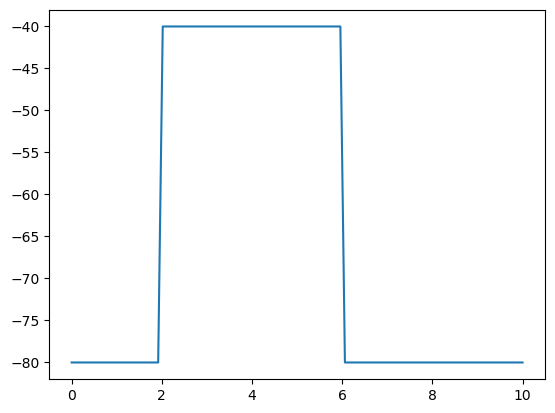

In [33]:
def V_target(t):
    V = -80 + (40) * (t>2) * (t<6)
    return V # return in millivolts
    
t = np.linspace(0,10,100)

plt.plot(t, V_target(t))
plt.show()

**Exercise 1b) Checking the units**

Let $V$ be denoted in millivolts and time in milliseconds. Let $C_{\rm m} = 0.05$ nF and $R_{\rm s} = 10$ M$\Omega$. 

Look at the ODE and make sure the units are consistent by hand. Make any necessary changes to units.

$$\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target} - V}{C_{\rm m} R_{\rm s}}.$$


**Exercise 1c) Solving the ODE numerically**

Now, implement the RHS of the ODE-system and use `scipy.integrate.solve_ivp` to solve it to find the membrane potential $V(t)$ in the period $t \in [0, 10]$ ms. Let the parameters and units be as given in (1b) and the initial condition be $V_0 = -80$ mV.

Plot your solution.

In [ ]:
from scipy.integrate import solve_ivp

In [19]:
def rhs(t, V, Cm, Rs):
    dV_dt = (V_target(t) - V)/(Cm*Rs)
    return dV_dt

In [24]:
# Define time array
time = (0,10)

# Define parameters
Cm = 0.05 # [nF]
Rs = 10 # [MOhm]
params = (Cm, Rs)

# Define initial condition
y0 = (-80,) #[mV]

# Call odeint
solution = solve_ivp(rhs, time, y0, args=params, max_step=0.1)

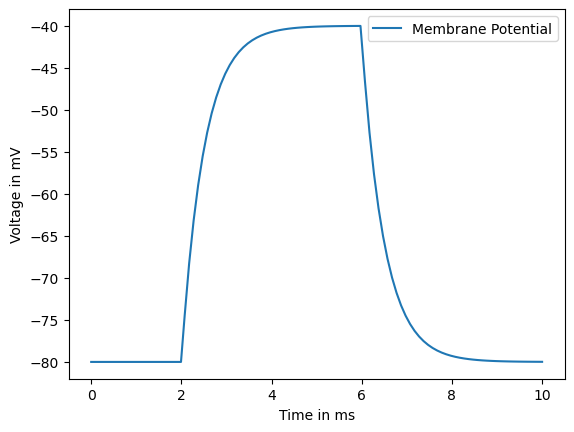

In [34]:
# Plot Solution
t = solution.t
V, = solution.y
plt.plot(t,V,label="Membrane Potential")
plt.xlabel('Time in ms')
plt.ylabel('Voltage in mV')
plt.legend()

# Display the figure
plt.show()

**Exercise 1d) Analyzing the solution**

Compare your solution of $V(t)$ to your plot of the prescribed $V_{\rm target}(t)$. Describe the differences. 

To make comparison easier, it might be a nice idea to plot the two over each other in the same figure.

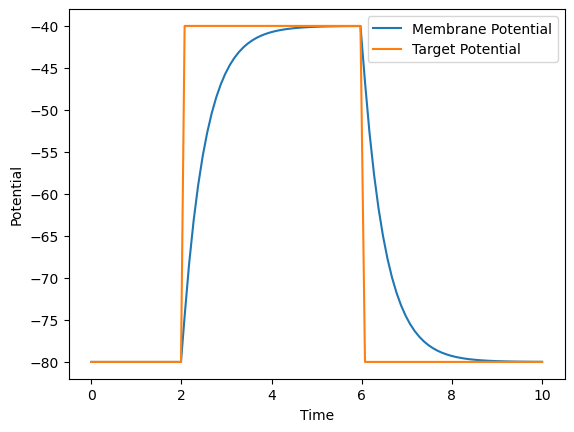

In [31]:
plt.plot(t,V,label="Membrane Potential")
plt.plot(t,V_target(t), label = "Target Potential")
plt.xlabel('Time')
plt.ylabel('Potential')
plt.legend()

# Display the figure
plt.show()

**(Optional) Exercise 1e) Finding the analytical solution**

Solve the ODE by hand. What kind of ODE/solution is this? What is the most important functional parameter in this solution?

Hint: The equation is an example of a *separable* differential equation.

**Exercise 1f) Playing around with the model parameters (Widget)**

Run the interactive widget below, and see how the membrane potential response changes as you change the membrane capacitance $C_{\rm m}$ and the series resistance $R_{\rm s}$. (You might need to run the cell twice for it to work).

If you want the membrane potential to follow the prescribed voltage as closely as possible, what restrictions does this put on $C_{\rm m}$ and $R_{\rm s}$?

In [32]:
import L3_widgets

L3_widgets.VoltageClampWidget().display()

interactive(children=(FloatSlider(value=0.05, description='Cm', max=0.1, min=0.005, step=0.005), IntSlider(val…

#### Discussion on Exercise 1

As you have probably seen through playing with the widget, for the voltage to follow the prescribed voltage, we want both the membrane capacitance and the series resistance to be small. In fact, it is the product of the two that is important, as this is the characteristic time constant of the membrane response:
$$\tau = C_{\rm m}\cdot R_{\rm s}.$$ 
If you solved (1e) you might have noticed this already. Simply put, the model says that the actual membrane potential will approach the prescribed potential as an exponential relaxation, with a relaxation time of $\tau$. If $\tau$ is big, we will need to wait a long time for it to reach the prescribed value.

For a whole cell voltage clamp protocol, the cell membrane capacitance is typically 0.05 nF, and the series resistance is usually in the range 5-20 M$\Omega$. This gives a noticeable delay in the membrane potential response, and capacitive currents that persist over several milliseconds. This can actually disturb the measurement of other currents, introducing noise.

In another technique, the 'patch' clamp, a small patch of the membrane is torn of (1 µm$^2$). This means the capacitance, $C_{\rm m}$ is drastically lowered ($\sim0.01$ pF). In a patch clamp, the series resistance is usually in the G$\Omega$ range, so the time constant becomes very small, and there are usually little noise due to the capacitive currents.

<a id="2"></a>
### Exercise 2: Calculating Nernst Potentials

The following table gives typical values for mammalian cardiomyocytes, and is taken from [Katz, 2010]

| Ion        | Intracellular | Extracellular  |
| -----------|:-------------:| -----:|
| Sodium (Na$^+$)    | 8 mM          | 110 mM |
| Potassium (K$^+$) | 100 mM        | 4 mM  |
| Calcium (Ca$^{2+}$) | 0.2 µM        | 1 mM  |

You will also need to know these physical constants

| Name | Symbol  | Value | Unit |
| -----------|:-------------:|-----:|------:|
| Faraday's constant  | $F$ | 96485 | C/mol |
| Gas Constant | $R$ |  8.314 | J/(mol K) |
| Temperature | $T$ | 310|  K | 

**Exercise 2a) Computing the Nernst potentials**

Based on the tabulated values, calculate the Nernst potentials for the three ionic species.

$$E_{\rm X} = \frac{RT}{zF}\ln \frac{[{\rm X}]_{\rm e}}{[{\rm X}]_{\rm i}}.$$

Print out the potentials in units of millivolts.

In [56]:
import numpy as np
F = 96485
R = 8.314
T = 310

E_Na = (R*T)/(1*F)*np.log(110/8) * 10**(3)
E_K  = (R*T)/(1*F)*np.log(4/100) * 10**(3)
E_Ca = (R*T)/(2*F)*np.log(1/(0.2e-3)) * 10**(3)
print(f"The voltage for Na is: {E_Na:5.1f} mV")
print(f"The voltage for K is: {E_K:5.1f} mV")
print(f"The voltage for Ca is: {E_Ca:5.1f} mV")

The voltage for Na is:  70.0 mV
The voltage for K is: -86.0 mV
The voltage for Ca is: 113.8 mV


**Exercise 2b) Interpreting the sign of the Nernst Potential**

You have received two positive answers, and one negative. Explain why this is the case.

Answer: The flux is in the opposite direction. The voltage is higher on the interior than the exterior, causing the flow of charge outwards for K.

**Exercise 2c) How much current is needed to charge the membrane?**

Assume we have a membrane that is resting at a potential -80 mV. Sodium channels in the membrane now open, and sodium ions flow into the cell until the membrane potential reaches a new equilibrium, this one at +40 mV. 

As the membrane behaves as a capacitor, the total charge that passes through the membrane can be approximated by

$$\Delta Q = C_m \Delta V$$

Use this formula to estimate the amount of charge that crosses the membrane if the membrane capacitance is 0.05 nF.

In [62]:
Cm = 0.05e-9
dV = 120e-3
dQ = dV * Cm * 1e12
print(f"The approximate charge that crosses the membrane: {dQ} pC")

The approximate charge that crosses the membrane: 6.0 pC


**Exercise 2d) Number of particles**

You can use Faraday's constant to go from a given charge to the number of charged particles (in terms of mols):

$$F = 96485 \mbox{ C/mol}.$$

Roughly how many Na$^+$-ions cross the membrane to change the membrane potential from -80 mV to +40 mv?


In [63]:
dNa = dQ/F
print(f"Approximately {dNa:1g} pmol of Na+ through the membrane.")

Approximately 6.21858e-05 pmol of Na+ through the membrane.


**Exercise 2e) Change in concentration**

Assuming the cell has a total volume of 20 picoliters, how much does the sodium concentration change as a result of this?


In [67]:
V = 20 # [pL]
dconc = dNa/V
print(f"Approximately sodium concentration change {dconc*1000:.4f} mM")
dconc_rel = 1 - (8-dconc*1000)/8
print(f"The relative sodium concentration change {dconc_rel:.3%}")

Approximately sodium concentration change 0.0031 mM
The relative sodium concentration change 0.039%


**Exercise 2f) Perturbing the Nernst potential**

In (2a) you found the Nernst potential for sodium for a cell under normal physiological conditions. Assume now that the intracellular sodium concentration of the cell has increased by 30%. How much does its Nernst potential change?

In [68]:
E_Na = R*T/F * np.log(110/8) * 1000
print(f"Original E_Na:              {E_Na:.1f} mV")

E_Na = R*T/F * np.log(110/(1.3*8)) * 1000
print(f"After 30% increase in Na:   {E_Na:.1f} mV")

Original E_Na:              70.0 mV
After 30% increase in Na:   63.0 mV


**Exercise 2g) Is the Nernst potential a constant? (Discuss)**

Based on your answers to the last two exercises. Explain why the Nernst potential can be considered a constant, despite it being a function of the intracellular and extracellular concentrations.

Answer: Changing the Nernst potential significantly does not affect the concentrations, and vice versa, as shown by 2e and 2f. Thus, it can be assumed constant to reduce computational effort. Altough it can be assumed constant for K and Na, it cannot be assumed constant for Ca as the intracellular concentration can vary over 1000x fold.

#### Discussion on Exercise 2

These back of the envelope calculations have shown us that (1) the ion concentration of sodium changes little, even when there is a big change in membrane potential, and (2) even a big change in ion concentration will lead to a relatively small change in the Nernst potential. The last point can be understood because it is only the logarithm of the concentration ratio that enters into the equation for the Nernst potential.

The takeaway here is that while the Nernst potential is technically a variable that should change with changes in ion concentrations, in practice it will change so little that it can be considered a constant in a model. The one major exception to this is calcium, which has such a low initial intracellular concentration that the relative change can be as much as a thousandfold increase in concentration. We will get back to why the calcium concentration is so different from the other species later in the course.

<a id="3"></a>
### Exercise 3: The Equilibrium Membrane Potential

For a membrane only permeable to sodium, the membrane potential will be governed by the ODE

$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = - g_{\rm Na} (V-E_{\rm Na}).$$

Where $C_{\rm m}$ is the membrane potential, and $g_{\rm Na}$ is the sodium conductance.

**Exercise 3a) Solve the model in Python**

Fill in the code below to define and solve the ODE numerically.
* Let $C_{\rm m} = 0.05$ nF and $g_{\rm Na}=0.005$ µS.
* The membrane potential should be given in units of mV and time in units of ms. 
* Make sure all units are compatible, and make any necessary changes.
* Assume an initial membrane potential of $V_0 = -80$ mV, and solve the ODE for $t\in[0, 100]$ ms.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [82]:
# Define the ODE
def rhs(t, V, Cm, g_Na, E_Na):
    dV_dt = (1/Cm) * (-g_Na) * (V - E_Na)
    return dV_dt


# Define the parameters and initial condition
T = (0, 100)
Cm = 0.05 # [nF]
g_Na = 0.005
F = 96485
R = 8.314
temp = 310
E_Na = (R*temp)/(1*F)*np.log(110/8) * 10**(3)
params = (Cm, g_Na, E_Na)
y0 = (-80,) 

# Solve the ODE
solution = solve_ivp(rhs, T, y0, args=params, max_step=0.01)

t = solution.t
V, = solution.y

**Exercise 3b) Analyzing the solution**

From the plot of your solution, what value does the membrane potential stabilize at? Approximately how long does it take for the membrane potential to equilibriate?

Answer: The membrane potential stabilizes at approximately 70 mV (converges to the Nernst potential of Na) at t = 50ms

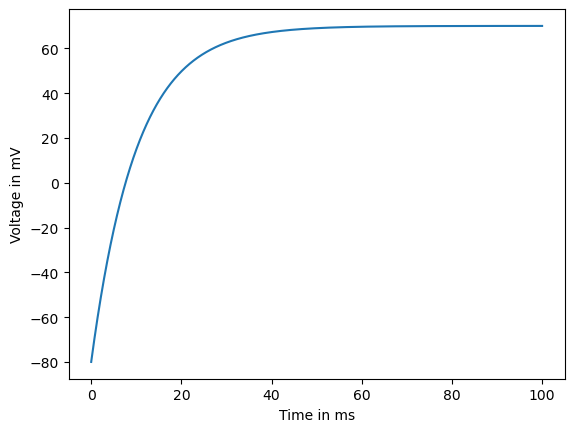

In [83]:
import matplotlib.pyplot as plt
plt.plot(t,V)
plt.xlabel("Time in ms")
plt.ylabel("Voltage in mV")
plt.show()

**(Optional) Exercise 3c) Analytical Solution**

Solve the ODE by hand. What is the time constant in the exponential relaxation? Compare this time constant to your plot.
* *Hint:* Using the subsitution $u = V-E_{\rm Na}$ turns the equation into an exponential decay ODE, which is separable.

**Exercise 3d) Adding more currents**

We now want to add a calcium current and a potassium current to the system. Recall that this gives the ODE
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = -\big[g_{\rm Na} (V-E_{\rm Na}) + g_{\rm K} (V-E_{\rm K}) + g_{\rm Ca} (V-E_{\rm Ca})\big].$$

* Let the sodium channel be identical to earlier
* Let $g_{\rm Ca} = 0.002$ µS and $g_{\rm K} = 0.05$ µS.
* Solve the equation from an initial potential of $V_0 = 0$ mV for $t \in [0, 50]$ ms.

**Hint: You can save time by copying your code cell from exercise (3a) and modifying it**

In [88]:
# Define the ODE
def rhs(t, V, Cm, g_Na, g_K, g_Ca, E_Na, E_K, E_Ca):
    dV_dt = (1/Cm) * -( (g_Na) * (V - E_Na) + g_K * (V - E_K) + g_Ca * (V - E_Ca))
    return dV_dt

# Define the parameters and initial condition
T = (0, 50)
Cm = 0.05
g_Na = 0.005
g_Ca = 0.002
g_K = 0.05
F = 96485
R = 8.314
temp = 310
E_Na = (R*temp)/(1*F)*np.log(110/8) * 10**(3)
E_K  = (R*temp)/(1*F)*np.log(4/100) * 10**(3)
E_Ca = (R*temp)/(2*F)*np.log(1/(0.2e-3)) * 10**(3)
params = (Cm, g_Na, g_K, g_Ca, E_Na, E_K, E_Ca)
y0 = (0,) 

# Solve the ODE
solution = solve_ivp(rhs, T, y0, args=params, max_step=0.01)

t = solution.t
V, = solution.y

**Exercise 3e) Analyzing the solution**

Plot your solution if you have not done so. What is the equilibrium potential of the system now? Explain why. Does the initial membrane potential impact what the equilibrium potential is?

**Answer:** The equilibrium potential around -65mV, which is closer to the to Nernst potential of K. This is because of its higher conductance (and hence lower resistance). The initial membrane potential does not impact the equilibrium potential at larger times.

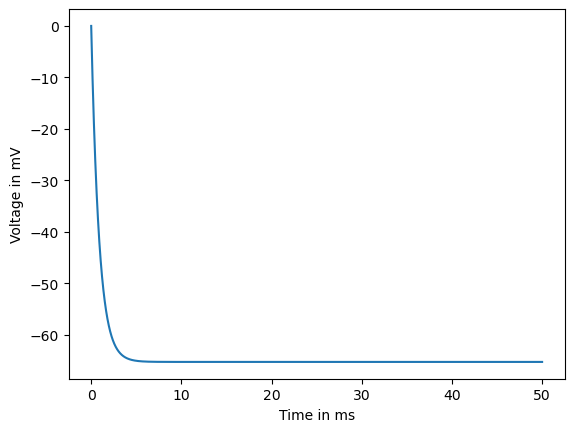

In [89]:
plt.plot(t,V)
plt.xlabel("Time in ms")
plt.ylabel("Voltage in mV")
plt.show()

**Exercise 3f) Resting membrane potential (Widget exercise)**

The resting membrane potential of the cell is around -80 mV. This is very close to the Nernst potential of potassium, but far from those of sodium and calcium. It is thus reasonable to say that a cell at rest must be much more permeable to potassium, than either of the other two species.

Run the cell below, and use the widget to estimate roughly how much stronger the potassium conductance is than the other two species for a cell at rest. (You might need to run the cell twice for it to work).

In [81]:
from L3_widgets import MembraneWidget
MembraneWidget().display()

interactive(children=(IntSlider(value=5, description='g_Na', max=30), IntSlider(value=5, description='g_Ca', m…

<a id="4"></a>
### Exercise 4: A super simple action potential model

So far we have modeled how the membrane potential reaches its equilibrium potential as an exponential relaxation. However, in practice, what we want to model are *action potentials*, which are spontaneous spikes in the membrane potential. These action potentials occur because different ion channels in the membrane open and close, changing the equilibrium potential.

To properly understand action potentials, we will need to understand when and why ion channels open or close, which is called ion channels *gating*. This is the topic for the next lecture. For now however, let us simply state that sodium channels in the membrane open for a short duration, and see how this would affect the membrane potential.

Let us model a membrane with sodium and potassium channels, (no calcium channels this time) so our ODE is
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = -g_{\rm Na} (V-E_{\rm Na}) - g_{\rm K} (V-E_{\rm K}).$$

Now we say, as before, that $g_{\rm K}$ is constant, i.e., these channels are always open and not gated. The sodium conductance however, is time dependent and equal to 
$$g_{\rm Na}(t) = \begin{cases}
0.55 {\rm\ µS} & \mbox{if } 2 {\rm\ ms} < t < 2.2 {\rm\ ms}, \\
0.003 {\rm\ µS} & \mbox{else.}
\end{cases}$$
This corresponds to the membrane having a large number of sodium channels that are mostly closed, but that open for a short duration, temporarily increasing the sodium conductance.

#### Exercise 4a) Solving the System

Fill in the code below to model this system for $t\in[0, 10]$ ms. Let $V_0 = -80$ mV.

Note that since $g_{\rm Na}$ now suddenly changes, `solve_ivp` might accidentally jump right over the important time span when a change happens. This is because `solve_ivp` is an adaptive solver which makes larger steps in time when the derivative is small. To work around this, you should use ensure the `max_step` argument is set low enough to capture the change in conductance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [95]:
# Define the ODE
def rhs(t, V, Cm, g_K, E_Na, E_K):
    g_Na = 0.55 if (2<t<2.2) else 0.003
    dV_dt = (1/Cm) * (-g_Na * (V-E_Na)  - g_K * (V-E_K))
    return dV_dt

# Define the parameters and initial condition
T = (0, 10)
Cm = 0.05 # nF
g_K =  0.075 # µS
F = 96485
R = 8.314
temp = 310
E_Na = (R*temp)/(1*F)*np.log(110/8) * 10**(3)
E_K  = (R*temp)/(1*F)*np.log(4/100) * 10**(3)
params = (Cm, g_K, E_Na, E_K)
y0 = (-80,) # mV

# Solve the ODE
solution = solve_ivp(rhs, T, y0, args=params, max_step=0.001)

t = solution.t
V, = solution.y

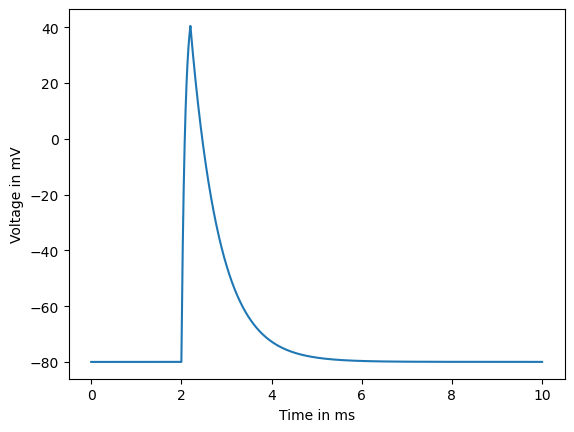

In [96]:
plt.plot(t, V)
plt.xlabel("Time in ms")
plt.ylabel("Voltage in mV")
plt.show()

#### Exercise 4b) Analyzing the result

Explain the behavior of our simple model. How does the membrane potential develop over time? What is driving the different changes?

**Answer:** The membrane potential increases rapidly from t = 2 to 2.2 ms, corresponding to the large conductance of Na at those time points. The value causes the potential to be closer to the Nernst potential of Na at those values, before settling back to -80 mV, the Nernst potential for K. (not verified lol)

#### Discussion

Here we have created a very simple model of an action potential, by saying that at some time sodium channels open and stay open for a short, fixed, duration. While this is a gross simplification of how sodium channels work, it is actually produces an action potential that is phenomenologically quite correct. At least for neuronal action potentials which last on the order of milliseconds. In cardiac cells, action potentials last for a few hundred milliseconds. You will understand why this is the case better when we get further in the course.